In [196]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt 
import random 
import networkx as nx 
import itertools 
import pickle 
from scipy.special import digamma
import timeit
from Block_PLSA.beta import Block_PLSA,index2ij
from Block_PLSA.utils_beta import draw_image_matrix,get_normalized_theta,get_top_docs,get_top_tokens,get_sub_input
import sklearn.metrics as metrics 

In [2]:
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)}) 

# load data

In [3]:
# cora dataset
G_cora=nx.read_adjlist('data/Cora_enrich/idx_adjlist.txt',nodetype=int,create_using=nx.DiGraph)
# cora texts
texts_cora=np.loadtxt('data/Cora_enrich/BOW_texts_3876.txt',dtype=np.int)

In [4]:
with open('data/Cora_enrich/tokens_3876.pickle','rb') as f:
    tokens=pickle.load(f)
tokens=np.array(tokens)

labels=[]
with open('data/Cora_enrich/labels.txt') as f:
    for line in f:
        labels.append(line.strip())
labels=np.array(labels)

# start

## original network

In [5]:
bp=Block_PLSA(G_cora,texts_cora)

In [11]:
theta,omega,phi,pi=bp.start(7,initialize='dir',n_iter_EM=100,beta=0.1,gamma_max_gap=1e-4,phi_max_gap=0.05)

EM:0,VI:0,gamma_gap:5428.490000
EM:0,VI:10,gamma_gap:6.598803
EM:0,VI:20,gamma_gap:0.175765
EM:0,VI:30,gamma_gap:0.005964
EM:0,VI:40,gamma_gap:0.000238
EM:0,phi_gap:10.135512,pi_gap:0.833248,omega_gap:8.952785
EM:1,VI:0,gamma_gap:0.000068
EM:1,phi_gap:1.293518,pi_gap:0.026119,omega_gap:1.273972
EM:2,VI:0,gamma_gap:1082.441816
EM:2,VI:10,gamma_gap:96.321831
EM:2,VI:20,gamma_gap:36.769667
EM:2,VI:30,gamma_gap:22.501957
EM:2,VI:40,gamma_gap:15.120616
EM:2,VI:50,gamma_gap:11.399974
EM:2,VI:60,gamma_gap:9.609149
EM:2,VI:70,gamma_gap:7.741614
EM:2,VI:80,gamma_gap:6.388476
EM:2,VI:90,gamma_gap:5.081664
EM:2,phi_gap:0.706880,pi_gap:0.012660,omega_gap:0.689669
EM:3,VI:0,gamma_gap:4.815422
EM:3,VI:10,gamma_gap:28.932892
EM:3,VI:20,gamma_gap:18.961725
EM:3,VI:30,gamma_gap:14.614789
EM:3,VI:40,gamma_gap:11.306264
EM:3,VI:50,gamma_gap:8.357038
EM:3,VI:60,gamma_gap:7.102639
EM:3,VI:70,gamma_gap:6.221672
EM:3,VI:80,gamma_gap:5.461470
EM:3,VI:90,gamma_gap:4.282865
EM:3,phi_gap:0.515498,pi_gap:0.008341

EM:24,phi_gap:0.212590,pi_gap:0.010236,omega_gap:0.218738
EM:25,VI:0,gamma_gap:0.000057
EM:25,phi_gap:0.202732,pi_gap:0.010421,omega_gap:0.207216
EM:26,VI:0,gamma_gap:63.113434
EM:26,VI:10,gamma_gap:3.951683
EM:26,VI:20,gamma_gap:0.710481
EM:26,VI:30,gamma_gap:0.150041
EM:26,VI:40,gamma_gap:0.032789
EM:26,VI:50,gamma_gap:0.007220
EM:26,VI:60,gamma_gap:0.001593
EM:26,VI:70,gamma_gap:0.000351
EM:26,phi_gap:0.192953,pi_gap:0.010453,omega_gap:0.198839
EM:27,VI:0,gamma_gap:0.000078
EM:27,phi_gap:0.182044,pi_gap:0.010092,omega_gap:0.189490
EM:28,VI:0,gamma_gap:54.010856
EM:28,VI:10,gamma_gap:2.135871
EM:28,VI:20,gamma_gap:0.233365
EM:28,VI:30,gamma_gap:0.028762
EM:28,VI:40,gamma_gap:0.003665
EM:28,VI:50,gamma_gap:0.000469
EM:28,phi_gap:0.170530,pi_gap:0.009462,omega_gap:0.179047
EM:29,VI:0,gamma_gap:0.000074
EM:29,phi_gap:0.162037,pi_gap:0.009037,omega_gap:0.170843
EM:30,VI:0,gamma_gap:33.852857
EM:30,VI:10,gamma_gap:0.158878
EM:30,VI:20,gamma_gap:0.000567
EM:30,phi_gap:0.155796,pi_gap:0.008

FINAL:VI:90,gamma_gap:0.000000


In [14]:
theta

array([[9.35370439e-02, 1.84179361e-06, 1.84179361e-06, 1.84179361e-06,
        1.84179361e-06, 1.84179361e-06, 1.84179361e-06],
       [1.84179361e-06, 1.79765218e-01, 1.84179361e-06, 1.84179361e-06,
        1.84179361e-06, 1.84179361e-06, 1.84179361e-06],
       [1.84179361e-06, 1.84179361e-06, 1.06464356e-01, 1.84179361e-06,
        1.84179361e-06, 1.84179361e-06, 1.84179361e-06],
       [1.84179361e-06, 1.84179361e-06, 1.84179361e-06, 1.70947594e-01,
        1.84179361e-06, 1.84179361e-06, 1.84179361e-06],
       [1.84179361e-06, 1.84179361e-06, 1.84179361e-06, 1.84179361e-06,
        2.38585358e-01, 1.84179361e-06, 1.84179361e-06],
       [1.84179361e-06, 1.84179361e-06, 1.84179361e-06, 1.84179361e-06,
        1.84179361e-06, 1.94248894e-01, 1.84179361e-06],
       [1.84179361e-06, 1.84179361e-06, 1.84179361e-06, 1.84179361e-06,
        1.84179361e-06, 1.84179361e-06, 1.63741806e-02]])

In [15]:
get_top_docs(omega,labels,10)

[[('Probabilistic_Methods', 0.014426979437897088),
  ('Theory', 0.01185156242073462),
  ('Theory', 0.01180787484844014),
  ('Theory', 0.011510269461115052),
  ('Theory', 0.01140466807631471),
  ('Theory', 0.010715556671958656),
  ('Theory', 0.0105999708885235),
  ('Theory', 0.010030044663492348),
  ('Theory', 0.008699340473524088),
  ('Theory', 0.00863147006867085)],
 [('Neural_Networks', 0.030391691433373853),
  ('Neural_Networks', 0.011208963211752614),
  ('Neural_Networks', 0.01097919680148807),
  ('Neural_Networks', 0.0094404226766483),
  ('Reinforcement_Learning', 0.008606884374184411),
  ('Neural_Networks', 0.008011680875044929),
  ('Neural_Networks', 0.006808253738279229),
  ('Neural_Networks', 0.006630196469424738),
  ('Neural_Networks', 0.006223650738578952),
  ('Neural_Networks', 0.0061499578715700914)],
 [('Case_Based', 0.017910355129583156),
  ('Case_Based', 0.009674301461440857),
  ('Neural_Networks', 0.008425124336264396),
  ('Case_Based', 0.008287737907735833),
  ('Case_

In [23]:
get_top_tokens(phi,tokens,10)

[[('state', 0.021187868176265945),
  ('control', 0.019738642448962843),
  ('time', 0.01691262743764616),
  ('agent', 0.013635530913919688),
  ('linear', 0.012245656148318093),
  ('point', 0.011987387732892499),
  ('condit', 0.011909939791834573),
  ('action', 0.011668555306228347),
  ('belief', 0.011027549306254306),
  ('converg', 0.010611863041460796)],
 [('network', 0.012955513757817417),
  ('case', 0.01220411747429286),
  ('tree', 0.009909374208385606),
  ('data', 0.0077137413374683906),
  ('decis', 0.007448105535003574),
  ('domain', 0.007043009078565324),
  ('train', 0.006899326155800452),
  ('rule', 0.00674168843865247),
  ('describ', 0.00657803324076344),
  ('structur', 0.006131467657655244)],
 [('case', 0.0074380574084524686),
  ('time', 0.006838664306963509),
  ('valu', 0.006566614933933922),
  ('distribut', 0.006527630841808076),
  ('probabl', 0.006466667890263198),
  ('number', 0.006204942728045871),
  ('paper', 0.0060187595038237686),
  ('work', 0.005951394311489079),
  ('g

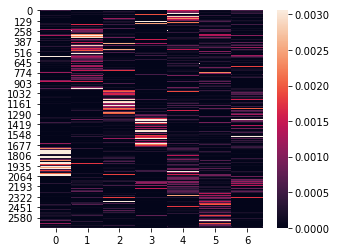

In [16]:
draw_image_matrix(omega,labels,figsize=(5,4))

In [20]:
get_normalized_theta(theta,method='col')

array([[1.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000],
       [0.000, 1.000, 0.000, 0.000, 0.000, 0.000, 0.000],
       [0.000, 0.000, 1.000, 0.000, 0.000, 0.000, 0.000],
       [0.000, 0.000, 0.000, 1.000, 0.000, 0.000, 0.000],
       [0.000, 0.000, 0.000, 0.000, 1.000, 0.000, 0.000],
       [0.000, 0.000, 0.000, 0.000, 0.000, 1.000, 0.000],
       [0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.999]])

## sub-networks 

### prepare input data

In [6]:
set(labels)

{'Case_Based',
 'Genetic_Algorithms',
 'Neural_Networks',
 'Probabilistic_Methods',
 'Reinforcement_Learning',
 'Rule_Learning',
 'Theory'}

In [162]:
classes=['Neural_Networks','Genetic_Algorithms','Theory']

In [163]:
G_sub,labels_sub,texts_sub,_=get_sub_input(classes,G_cora,labels,texts_cora)

### start 

In [25]:
bp=Block_PLSA(G_sub,texts_sub)

In [37]:
K=3
initialize='dir'
alpha=0.01
n_iter_EM=50
n_iter_VI=100
gamma_max_gap=0.001
phi_max_gap=0.001
gamma_default=0.01
int_range=(1, 10)
beta=0.1
verbose=10

In [38]:
theta,omega,phi,pi=bp.start(K,initialize,alpha,n_iter_EM,n_iter_VI,gamma_max_gap,phi_max_gap,gamma_default,int_range,beta,verbose)

EM:0,VI:0,gamma_gap:2864.090000
EM:0,VI:10,gamma_gap:0.012860
EM:0,phi_gap:4.645997,pi_gap:0.465579,omega_gap:4.163624
EM:1,VI:0,gamma_gap:0.000273
EM:1,phi_gap:0.438832,pi_gap:0.002924,omega_gap:0.435000
EM:2,VI:0,gamma_gap:149.917564
EM:2,VI:10,gamma_gap:21.718539
EM:2,VI:20,gamma_gap:8.719428
EM:2,VI:30,gamma_gap:4.367352
EM:2,VI:40,gamma_gap:2.541386
EM:2,VI:50,gamma_gap:1.693835
EM:2,VI:60,gamma_gap:1.234616
EM:2,VI:70,gamma_gap:0.926311
EM:2,VI:80,gamma_gap:0.710222
EM:2,VI:90,gamma_gap:0.554049
EM:2,phi_gap:0.241109,pi_gap:0.002617,omega_gap:0.225762
EM:3,VI:0,gamma_gap:0.438061
EM:3,VI:10,gamma_gap:9.075196
EM:3,VI:20,gamma_gap:5.577713
EM:3,VI:30,gamma_gap:4.085491
EM:3,VI:40,gamma_gap:3.067356
EM:3,VI:50,gamma_gap:2.335733
EM:3,VI:60,gamma_gap:1.807445
EM:3,VI:70,gamma_gap:1.425275
EM:3,VI:80,gamma_gap:1.207453
EM:3,VI:90,gamma_gap:1.056477
EM:3,phi_gap:0.164060,pi_gap:0.003956,omega_gap:0.146723
EM:4,VI:0,gamma_gap:0.972213
EM:4,VI:10,gamma_gap:9.705040
EM:4,VI:20,gamma_gap:

EM:35,phi_gap:0.043127,pi_gap:0.001770,omega_gap:0.057485
EM:36,VI:0,gamma_gap:0.000264
EM:36,phi_gap:0.041046,pi_gap:0.001477,omega_gap:0.054940
EM:37,VI:0,gamma_gap:8.528500
EM:37,VI:10,gamma_gap:0.001060
EM:37,phi_gap:0.039883,pi_gap:0.001210,omega_gap:0.053032
EM:38,VI:0,gamma_gap:0.000136
EM:38,phi_gap:0.039070,pi_gap:0.000797,omega_gap:0.051471
EM:39,VI:0,gamma_gap:8.049779
EM:39,VI:10,gamma_gap:0.000704
EM:39,phi_gap:0.037233,pi_gap:0.000362,omega_gap:0.049379
EM:40,VI:0,gamma_gap:0.000241
EM:40,phi_gap:0.034625,pi_gap:0.000051,omega_gap:0.046803
EM:41,VI:0,gamma_gap:7.971563
EM:41,VI:10,gamma_gap:0.000466
EM:41,phi_gap:0.032432,pi_gap:0.000357,omega_gap:0.044486
EM:42,VI:0,gamma_gap:0.000154
EM:42,phi_gap:0.031030,pi_gap:0.000593,omega_gap:0.042844
EM:43,VI:0,gamma_gap:7.612888
EM:43,VI:10,gamma_gap:0.000338
EM:43,phi_gap:0.030148,pi_gap:0.000817,omega_gap:0.041624
EM:44,VI:0,gamma_gap:0.000108
EM:44,phi_gap:0.029043,pi_gap:0.001109,omega_gap:0.040220
EM:45,VI:0,gamma_gap:7.141

### evaluate 

In [39]:
theta 

array([[0.383, 0.000, 0.000],
       [0.000, 0.333, 0.000],
       [0.000, 0.000, 0.284]])

In [40]:
get_normalized_theta(theta,method='row')

array([[1.000, 0.000, 0.000],
       [0.000, 1.000, 0.000],
       [0.000, 0.000, 1.000]])

In [41]:
get_top_tokens(phi,tokens)

[[('class', 0.008969957502289074),
  ('train', 0.00869856619192245),
  ('network', 0.00833105944919554),
  ('error', 0.007642589712591587),
  ('data', 0.006926253325288845),
  ('case', 0.006806666654216805),
  ('time', 0.006246045904604301),
  ('bound', 0.006167355930270543),
  ('distribut', 0.005988912296762903),
  ('number', 0.005587060095415608)],
 [('genet', 0.014897243314347393),
  ('gen', 0.013314964605762595),
  ('program', 0.012764321966053597),
  ('ga', 0.011795549704394781),
  ('tree', 0.011729228170928996),
  ('search', 0.011538330623581413),
  ('popul', 0.009036115131240195),
  ('fit', 0.008866260811805768),
  ('select', 0.008461715033643234),
  ('oper', 0.007649688592552691)],
 [('network', 0.021082324720810237),
  ('al', 0.009343459258650034),
  ('et', 0.009145795834316699),
  ('neural', 0.008703461869147016),
  ('input', 0.007110051632680281),
  ('sequenc', 0.005926562679418558),
  ('neuron', 0.005886825287039045),
  ('time', 0.005667713878675806),
  ('unit', 0.005539972

In [134]:
get_top_docs(omega,labels_sub)

[[('Neural_Networks', 0.013472857171920049),
  ('Theory', 0.010897730776432312),
  ('Theory', 0.009051293007161228),
  ('Theory', 0.008672483276573318),
  ('Theory', 0.00861151500232789),
  ('Theory', 0.008429049069017596),
  ('Theory', 0.008111121228710657),
  ('Theory', 0.007487556992600639),
  ('Theory', 0.007457179529685392),
  ('Neural_Networks', 0.007439915822437567)],
 [('Theory', 0.015241519891326402),
  ('Neural_Networks', 0.009467620539857923),
  ('Theory', 0.009180143447658823),
  ('Theory', 0.008030816839441082),
  ('Neural_Networks', 0.007324408115452854),
  ('Neural_Networks', 0.007160098717173557),
  ('Theory', 0.006728720937195577),
  ('Neural_Networks', 0.006542891197397086),
  ('Neural_Networks', 0.006042737712047683),
  ('Neural_Networks', 0.005570893740274064)],
 [('Genetic_Algorithms', 0.10600766021121995),
  ('Neural_Networks', 0.0287375190064824),
  ('Genetic_Algorithms', 0.013378002566295668),
  ('Genetic_Algorithms', 0.011657642743762995),
  ('Genetic_Algorithm

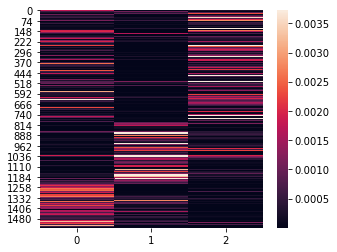

In [43]:
draw_image_matrix(omega,labels_sub,(5,4))

In [44]:
def get_cluster_results(omega):
    result=[]
    for i in range(omega.shape[1]):
        result.append(np.argmax(omega[:,i]))
    return result 

In [131]:
y_pred=get_cluster_results(omega)

In [132]:
metrics.adjusted_mutual_info_score(labels_sub,y_pred)

0.4309558871883757

In [133]:
metrics.normalized_mutual_info_score(labels_sub,y_pred)

0.43166604032320677

In [135]:
idx_class_dict={0:'Theory',1:'Neural_Networks',2:'Genetic_Algorithms'}

In [136]:
labels_pred=[idx_class_dict[i] for i in y_pred]

In [137]:
metrics.f1_score(labels_sub,labels_pred,average='macro')

0.7667570950225372

In [138]:
metrics.f1_score(labels_sub,labels_pred,average='micro')

0.779430789133247

In [139]:
metrics.f1_score(labels_sub,labels_pred,average='weighted')

0.7772232924765397

In [140]:
metrics.accuracy_score(labels_sub,labels_pred)

0.779430789133247

## predict 

In [164]:
G=G_sub.copy() 
removed_edges_ratio=0.2 

In [165]:
removed_edges_number=int(len(G.edges)*removed_edges_ratio) 
removed_edges=random.sample(list(G.edges),removed_edges_number) 
G.remove_edges_from(removed_edges)

In [ ]:
np.random.sample()

In [206]:
def get_train_graph(G,removed_edges_ratio=0.2,seed=1):
    G=G.copy() 
    removed_edges_ratio=0.2  
    removed_edges_number=int(len(G.edges)*removed_edges_ratio) 
    rs=random.getstate()
    random.seed(seed)
    removed_edges=random.sample(list(G.edges),removed_edges_number) 
    random.setstate(rs)
    G.remove_edges_from(removed_edges)
    
    return G,removed_edges 

In [166]:
bp=Block_PLSA(G,texts_sub)

In [167]:
K=3
initialize='dir'
alpha=0.001
n_iter_EM=100
n_iter_VI=100
gamma_max_gap=0.001
phi_max_gap=0.001
gamma_default=0.01
int_range=(1, 10)
beta=0.1
verbose=10

In [168]:
theta,omega,phi,pi=bp.start(K,initialize,alpha,n_iter_EM,n_iter_VI,gamma_max_gap,phi_max_gap,gamma_default,int_range,beta,verbose)

EM:0,VI:0,gamma_gap:2291.009000
EM:0,VI:10,gamma_gap:0.042760
EM:0,phi_gap:4.858631,pi_gap:0.483834,omega_gap:4.348142
EM:1,VI:0,gamma_gap:0.000227
EM:1,phi_gap:0.514952,pi_gap:0.009364,omega_gap:0.501147
EM:2,VI:0,gamma_gap:784.235924
EM:2,VI:10,gamma_gap:43.625953
EM:2,VI:20,gamma_gap:8.229531
EM:2,VI:30,gamma_gap:1.799835
EM:2,VI:40,gamma_gap:0.594072
EM:2,VI:50,gamma_gap:0.690911
EM:2,VI:60,gamma_gap:0.693875
EM:2,VI:70,gamma_gap:0.689727
EM:2,VI:80,gamma_gap:0.693712
EM:2,VI:90,gamma_gap:0.709845
EM:2,phi_gap:0.296367,pi_gap:0.003504,omega_gap:0.265334
EM:3,VI:0,gamma_gap:0.742464
EM:3,VI:10,gamma_gap:10.529629
EM:3,VI:20,gamma_gap:3.734226
EM:3,VI:30,gamma_gap:1.614361
EM:3,VI:40,gamma_gap:0.381423
EM:3,VI:50,gamma_gap:0.172376
EM:3,VI:60,gamma_gap:0.084242
EM:3,VI:70,gamma_gap:0.041193
EM:3,VI:80,gamma_gap:0.020110
EM:3,VI:90,gamma_gap:0.010224
EM:3,phi_gap:0.220107,pi_gap:0.002483,omega_gap:0.193052
EM:4,VI:0,gamma_gap:0.005554
EM:4,VI:10,gamma_gap:10.102523
EM:4,VI:20,gamma_ga

EM:27,VI:40,gamma_gap:0.050451
EM:27,VI:50,gamma_gap:0.019735
EM:27,VI:60,gamma_gap:0.007693
EM:27,VI:70,gamma_gap:0.002994
EM:27,VI:80,gamma_gap:0.001165
EM:27,phi_gap:0.043616,pi_gap:0.005551,omega_gap:0.039968
EM:28,VI:0,gamma_gap:0.000877
EM:28,phi_gap:0.041736,pi_gap:0.005408,omega_gap:0.036855
EM:29,VI:0,gamma_gap:8.542618
EM:29,VI:10,gamma_gap:0.453731
EM:29,VI:20,gamma_gap:0.119355
EM:29,VI:30,gamma_gap:0.039425
EM:29,VI:40,gamma_gap:0.013753
EM:29,VI:50,gamma_gap:0.004872
EM:29,VI:60,gamma_gap:0.001722
EM:29,phi_gap:0.040627,pi_gap:0.005391,omega_gap:0.034719
EM:30,VI:0,gamma_gap:0.000831
EM:30,phi_gap:0.039969,pi_gap:0.005425,omega_gap:0.032910
EM:31,VI:0,gamma_gap:7.760779
EM:31,VI:10,gamma_gap:0.232312
EM:31,VI:20,gamma_gap:0.016775
EM:31,VI:30,gamma_gap:0.002880
EM:31,phi_gap:0.039941,pi_gap:0.005448,omega_gap:0.032468
EM:32,VI:0,gamma_gap:0.000865
EM:32,phi_gap:0.039653,pi_gap:0.005437,omega_gap:0.032633
EM:33,VI:0,gamma_gap:7.449627
EM:33,VI:10,gamma_gap:0.285694
EM:33,V

EM:83,phi_gap:0.006448,pi_gap:0.001434,omega_gap:0.007788
EM:84,VI:0,gamma_gap:0.000705
EM:84,phi_gap:0.006125,pi_gap:0.001366,omega_gap:0.007380
EM:85,VI:0,gamma_gap:0.975968
EM:85,VI:10,gamma_gap:0.053525
EM:85,VI:20,gamma_gap:0.007659
EM:85,VI:30,gamma_gap:0.001093
EM:85,phi_gap:0.005824,pi_gap:0.001300,omega_gap:0.007020
EM:86,VI:0,gamma_gap:0.000741
EM:86,phi_gap:0.005573,pi_gap:0.001238,omega_gap:0.006716
EM:87,VI:0,gamma_gap:0.985836
EM:87,VI:10,gamma_gap:0.054156
EM:87,VI:20,gamma_gap:0.007540
EM:87,VI:30,gamma_gap:0.001047
EM:87,phi_gap:0.005397,pi_gap:0.001185,omega_gap:0.006506
EM:88,VI:0,gamma_gap:0.000706
EM:88,phi_gap:0.005319,pi_gap:0.001148,omega_gap:0.006390
EM:89,VI:0,gamma_gap:1.103235
EM:89,VI:10,gamma_gap:0.058642
EM:89,VI:20,gamma_gap:0.007916
EM:89,VI:30,gamma_gap:0.001066
EM:89,phi_gap:0.005321,pi_gap:0.001125,omega_gap:0.006393
EM:90,VI:0,gamma_gap:0.000714
EM:90,phi_gap:0.005368,pi_gap:0.001113,omega_gap:0.006490
EM:91,VI:0,gamma_gap:1.123854
EM:91,VI:10,gamma

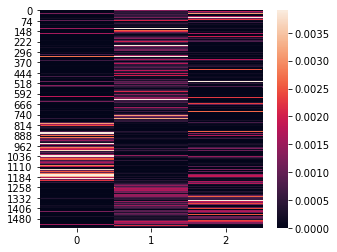

In [169]:
draw_image_matrix(omega,labels_sub,(5,4))

In [170]:
theta 

array([[0.328, 0.000, 0.000],
       [0.000, 0.639, 0.032],
       [0.000, 0.000, 0.000]])

In [220]:
def predict_links(G,theta,omega,num_pred_edges):
    edges_to_be_pred=list(set(np.ndindex(G.number_of_nodes(),G.number_of_nodes()))-set(G.edges))
    edges_proba=[]
    for i,j in edges_to_be_pred:
        p=(theta.flatten()*np.repeat(omega[:,i],K)*np.tile(omega[:,j],K)).sum()
        edges_proba.append((i,j,p))
    sorted_edges_proba=sorted(edges_proba,key=lambda x:x[2],reverse=True)
    return [(i,j) for i,j,k in sorted_edges_proba[:num_pred_edges]]

In [223]:
def pred_links_acc(pred_links,true_links):
    correct=len(set.intersection(set(pred_links),set(true_links))) 
    acc=correct/len(pred_links)
    return correct,acc 

In [222]:
pred_links=predict_links(G,theta,omega,100)

In [224]:
correct,acc=pred_links_acc(pred_links,removed_edges)

In [171]:
edges_to_be_pred=list(set(np.ndindex(G.number_of_nodes(),G.number_of_nodes()))-set(G.edges))

In [172]:
edges_proba=[]
for i,j in edges_to_be_pred:
    p=(theta.flatten()*np.repeat(omega[:,i],K)*np.tile(omega[:,j],K)).sum()
    edges_proba.append((i,j,p))

In [173]:
sorted_edges_proba=sorted(edges_proba,key=lambda x:x[2],reverse=True)

In [174]:
sorted_edges_proba

[(683, 683, 0.00013003269118874676),
 (971, 971, 0.00012976062917413706),
 (971, 777, 0.00010617639670383263),
 (777, 971, 0.00010616852837476323),
 (971, 319, 0.0001047581547206394),
 (319, 971, 0.00010475477024744816),
 (971, 510, 0.00010049637362094891),
 (510, 971, 0.00010047692159465269),
 (777, 777, 8.738702922162585e-05),
 (319, 777, 8.626170925558877e-05),
 (777, 319, 8.626129479449474e-05),
 (683, 986, 8.55849252651651e-05),
 (319, 319, 8.515354604671967e-05),
 (971, 1542, 8.351354195703281e-05),
 (1542, 971, 8.333422854037328e-05),
 (777, 510, 8.281705233117034e-05),
 (510, 777, 8.281380320790742e-05),
 (319, 510, 8.17583472044243e-05),
 (510, 319, 8.175592500289842e-05),
 (971, 1408, 7.975834376657909e-05),
 (1408, 971, 7.970118598166678e-05),
 (510, 510, 7.850557374451233e-05),
 (683, 552, 7.328637529816854e-05),
 (777, 1542, 6.861161827062186e-05),
 (1542, 777, 6.858056023951279e-05),
 (319, 1542, 6.771896654747807e-05),
 (1542, 319, 6.769616202228349e-05),
 (683, 435, 6.6

In [175]:
len(sorted_edges_proba)

2387824

In [176]:
len(removed_edges)

573

In [177]:
len(set.intersection(set([(edge[0],edge[1]) for edge in sorted_edges_proba[:1000000]]),set(removed_edges))) 

373

In [ ]:
len(set.intersection(set([(edge[0],edge[1]) for edge in sorted_edges_proba[:1000000]]),set(removed_edges))) 

In [114]:
[(edge[0],edge[1]) for edge in sorted_edges_proba[:removed_edges_number]]

[(986, 986),
 (683, 986),
 (986, 683),
 (986, 971),
 (971, 986),
 (319, 986),
 (986, 319),
 (510, 986),
 (986, 510),
 (777, 986),
 (986, 777),
 (1542, 986),
 (986, 1542),
 (1408, 986),
 (986, 1408),
 (1493, 986),
 (986, 1493),
 (683, 683),
 (953, 986),
 (986, 953),
 (375, 986),
 (986, 375),
 (954, 986),
 (986, 954),
 (857, 986),
 (986, 857),
 (583, 986),
 (986, 583),
 (986, 987),
 (987, 986),
 (986, 1413),
 (1413, 986),
 (209, 986),
 (986, 209),
 (1079, 986),
 (986, 1079),
 (1457, 986),
 (986, 1457),
 (1435, 986),
 (986, 1435),
 (986, 1130),
 (1130, 986),
 (986, 1407),
 (1407, 986),
 (1119, 986),
 (986, 1119),
 (328, 986),
 (986, 328),
 (986, 402),
 (402, 986),
 (216, 986),
 (986, 216),
 (930, 986),
 (986, 930),
 (1390, 986),
 (986, 1390),
 (1098, 986),
 (986, 1098),
 (986, 784),
 (784, 986),
 (1433, 986),
 (986, 1433),
 (323, 986),
 (986, 323),
 (786, 986),
 (986, 786),
 (1114, 986),
 (986, 1114),
 (806, 986),
 (986, 806),
 (601, 986),
 (986, 601),
 (199, 986),
 (986, 199),
 (986, 127

In [119]:
set.intersection(set(removed_edges),set([(792,800),]))

{(792, 800)}

In [178]:
pred_edges_number=1000

In [179]:
# generate new edges
edges_pred=[]
for i in range(pred_edges_number):
    k=np.nonzero(stats.multinomial.rvs(1,theta.flatten()))[0].item() 
    k_i,k_j=index2ij(k,K)
    s=np.nonzero(stats.multinomial.rvs(1,omega[k_i,:]))[0].item() 
    r=np.nonzero(stats.multinomial.rvs(1,omega[k_j,:]))[0].item() 
    edges_pred.append((s,r)) 

In [181]:
set.intersection(set(edges_pred),set(removed_edges))

set()

In [157]:
len(set(removed_edges))

573

In [186]:
id_label_dict={}
for i,l in enumerate(labels_sub):
    id_label_dict[i]=l


In [189]:
# check data interactions
label_id_dict={v:k for k,v in enumerate(set(labels_sub))}
block_mat=np.zeros((len(label_id_dict),len(label_id_dict)))
for e in G.edges:
    block_mat[label_id_dict[id_label_dict[e[0]]],label_id_dict[id_label_dict[e[1]]]]+=1 

In [190]:
block_mat

array([[433.000, 76.000, 8.000],
       [63.000, 986.000, 22.000],
       [10.000, 18.000, 676.000]])

In [194]:
block_mat/block_mat.sum()

array([[0.189, 0.033, 0.003],
       [0.027, 0.430, 0.010],
       [0.004, 0.008, 0.295]])

In [191]:
label_id_dict

{'Theory': 0, 'Neural_Networks': 1, 'Genetic_Algorithms': 2}

In [192]:
theta 

array([[0.328, 0.000, 0.000],
       [0.000, 0.639, 0.032],
       [0.000, 0.000, 0.000]])

In [198]:
y_pred=get_cluster_results(omega)
id_cluster_dict={k:v for k,v in enumerate(y_pred)}

In [200]:

block_mat_cluster=np.zeros((K,K))
for e in G.edges:
    block_mat_cluster[id_cluster_dict[e[0]],id_cluster_dict[e[1]]]+=1

In [201]:
block_mat_cluster

array([[679.000, 41.000, 36.000],
       [66.000, 992.000, 129.000],
       [25.000, 68.000, 256.000]])

In [205]:
block_mat_cluster/block_mat_cluster.sum() 

array([[0.296, 0.018, 0.016],
       [0.029, 0.433, 0.056],
       [0.011, 0.030, 0.112]])

In [204]:
theta 

array([[0.328, 0.000, 0.000],
       [0.000, 0.639, 0.032],
       [0.000, 0.000, 0.000]])

In [203]:
get_top_docs(omega,labels_sub)

[[('Genetic_Algorithms', 0.019783955645617846),
  ('Genetic_Algorithms', 0.01631118730741668),
  ('Genetic_Algorithms', 0.016103234560607332),
  ('Genetic_Algorithms', 0.015463661983056215),
  ('Genetic_Algorithms', 0.012800234719088676),
  ('Genetic_Algorithms', 0.012265145777462764),
  ('Genetic_Algorithms', 0.009458941665083235),
  ('Genetic_Algorithms', 0.008879806439314533),
  ('Genetic_Algorithms', 0.008781294780135796),
  ('Genetic_Algorithms', 0.00845646487456073)],
 [('Neural_Networks', 0.014125477976319073),
  ('Theory', 0.007362751332745529),
  ('Neural_Networks', 0.007340236283548607),
  ('Theory', 0.006988760942786319),
  ('Theory', 0.005467920498624936),
  ('Neural_Networks', 0.005254768302733228),
  ('Neural_Networks', 0.005097234390876109),
  ('Neural_Networks', 0.005091477977579214),
  ('Neural_Networks', 0.004997984287585027),
  ('Neural_Networks', 0.004726560059385114)],
 [('Genetic_Algorithms', 0.18678597567473948),
  ('Theory', 0.0401438549248282),
  ('Theory', 0.0

In [ ]:
# to be done :
# check link prediction performence on separate block-lda 